## Домашнее задание <a class='anchor' id='hw'>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [6]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * sum(W**2) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [8]:
lambda_list = [10**x for x in range(3, -8, -1)]
display(lambda_list)

[1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

In [9]:
weights = np.zeros([len(lambda_list), X.shape[1] + 1])
for i, reg in enumerate(lambda_list):
    weights[i, 0] = reg    
    weights[i, 1:] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=reg)

Iter: 0, weights: [-493.92588972 -503.59239883 -502.10728526 -503.56873099], error 3231.5131394369696
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan], error nan
Iter: 4000, weights: [nan nan nan nan], error nan
Iter: 4500, weights: [nan nan nan nan], error nan
Final MSE: nan
Iter: 0, weights: [-27.67479654 -38.83078911 -36.69628618 -37.32446412], error 3227.727986894858
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan]

Iter: 500, weights: [56.49983624  6.30297977 -0.35628687  6.57129317], error 24.90461893949523
Iter: 1000, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496611
Iter: 1500, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 2000, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 2500, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 3000, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 3500, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 4000, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Iter: 4500, weights: [56.49983624  6.30300675 -0.35641713  6.57140069], error 24.90461893496606
Final MSE: 24.90461893496606


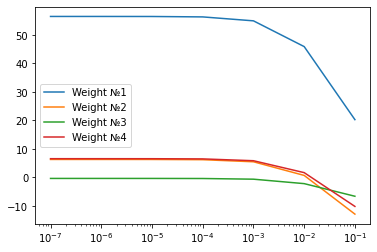

In [10]:
plt.figure()
for reg in range(X.shape[1]):
    plt.plot(weights[:, 0], weights[:, reg + 1], label=f'Weight №{reg+1}')
plt.xscale('log')
plt.legend()
plt.show()

Вывод: при увеличении $\lambda$ до некотрого предела (в данном случае до $10^-2$) веса начинают уменьшаться вплоть до околонулевых значений

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * (sum(abs(W))) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
weights = np.zeros([len(lambda_list), X.shape[1] + 1])
for i, reg in enumerate(lambda_list):
    weights[i, 0] = reg    
    weights[i, 1:] = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=reg)

Iter: 0, weights: [-250.79778961 -260.70875179 -260.18856645 -258.90970994], error 3282.2914893144016
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan], error nan
Iter: 4000, weights: [nan nan nan nan], error nan
Iter: 4500, weights: [nan nan nan nan], error nan
Final MSE: nan
Iter: 0, weights: [-13.06563636 -23.00825672 -23.61694782 -22.13308292], error 3278.57964185781
Iter: 500, weights: [nan nan nan nan], error nan
Iter: 1000, weights: [nan nan nan nan], error nan
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan],

Iter: 4000, weights: [56.49996513  6.30307502 -0.35639487  6.5714603 ], error 24.904618879539946
Iter: 4500, weights: [56.49996513  6.30307502 -0.35639487  6.5714603 ], error 24.904618879539946
Final MSE: 24.904618879539946
Iter: 0, weights: [12.23879188  2.47556667  1.28951116  1.90697806], error 3256.9492538238724
Iter: 500, weights: [56.49999651  6.30306657 -0.3562684   6.5713749 ], error 24.90461887965019
Iter: 1000, weights: [56.49999651  6.30309164 -0.35638945  6.57147481], error 24.904618876934684
Iter: 1500, weights: [56.49999651  6.30309165 -0.35638945  6.57147481], error 24.904618876934695
Iter: 2000, weights: [56.49999651  6.30309165 -0.35638945  6.57147481], error 24.90461887693472
Iter: 2500, weights: [56.49999651  6.30309165 -0.35638945  6.57147481], error 24.90461887693472
Iter: 3000, weights: [56.49999651  6.30309165 -0.35638945  6.57147481], error 24.90461887693472
Iter: 3500, weights: [56.49999651  6.30309165 -0.35638945  6.57147481], error 24.90461887693472
Iter: 400

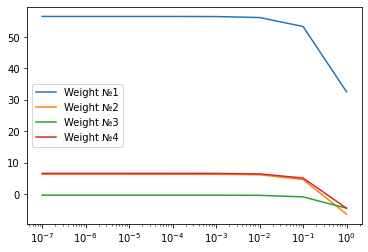

In [13]:
plt.figure()
for reg in range(X.shape[1]):
    plt.plot(weights[:, 0], weights[:, reg + 1], label=f'Weight №{reg+1}')
plt.xscale('log')
plt.legend()
plt.show()

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [14]:
display(min_max_scale(X[:, 1])),
display(standard_scale(X[:, 1])),
display(min_max_scale(standard_scale(X[:, 1]))),
display(standard_scale(min_max_scale(X[:, 1])))

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

array([-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
       -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339])

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

array([-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,  7.07106781e-01,
       -1.96261557e-16, -1.06066017e+00,  7.07106781e-01,  2.47487373e+00,
       -7.07106781e-01, -3.53553391e-01])

При стандартизации и нормализации происходит только масштабирование данных, следовательно, применение обоих методов возможно, но не имеет смысла, так как данные будут масштабированы тем методом, который был применён последним

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [15]:
# классический  GD
def gradient_descent_custom(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    results = np.zeros((iterations,2))
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        
        results[i, :] = [i, err]
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    
    print(f'Final MSE: {err}')
    return W, results

In [16]:
# стохастический градиентный спуск
def stohastic_gradient_descent_custom(X, y, iterations, batch_size=1, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    results = np.zeros((iterations, 2))        
    for i in range(0, iterations):
        
        inds = np.random.randint(n, size=batch_size)

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]

        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))
        results[i, :] = [i, err]
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {err}')
    return W, results

In [17]:
X, y = datasets.make_regression(100, 5, n_targets=1, noise=5)

In [18]:
display(X, y)

array([[-1.97444793e-01,  1.11117692e-01,  1.15131368e+00,
        -1.33420480e-01, -3.44739163e-01],
       [ 1.36067736e+00, -4.46341705e-01,  1.84195581e-01,
         1.02409928e+00, -8.66504653e-01],
       [-7.99745195e-01, -8.60221456e-01,  1.02388642e+00,
        -1.24952040e-01, -1.48725890e+00],
       [-1.16796558e-01, -5.54466286e-02, -3.43031002e-01,
        -1.94127928e+00,  7.60216981e-01],
       [-1.34495514e+00,  4.29990362e-02,  1.06740487e+00,
         7.68175187e-01,  7.79661351e-01],
       [-5.23786768e-01, -2.64180414e+00, -7.26141766e-01,
         1.86194213e-01, -1.46147845e-01],
       [-2.39781340e+00, -1.41342372e+00, -1.33341806e+00,
         1.07166335e-01, -1.12168083e+00],
       [ 7.14678729e-01,  7.92340494e-01, -1.46900883e+00,
        -1.16837283e+00,  2.08693258e+00],
       [ 8.71491658e-01, -2.31376782e-01,  1.06782161e+00,
         5.04336813e-01,  9.57981521e-01],
       [-9.56822947e-01,  4.56515232e-01, -1.90499879e+00,
        -2.45542415e+00

array([  23.11358093,    0.47382195, -105.7715395 ,  -39.98033125,
        117.76058489,  -96.55216363, -219.67168234,   68.42462785,
        164.83334453, -205.88229851,  -64.0105065 , -134.56257961,
         73.83006626,  101.40075756, -108.78186405,   -5.92478594,
         72.21269834,  -59.29647585,   73.09713879,  -52.39840429,
        148.65747908,  133.16888938,   57.52499177, -121.58817889,
        -22.38266976,  -62.36132953,  146.23978089, -151.60333733,
         61.83268327,    6.93436922,  121.85760417,  289.57525675,
         54.58788099,  -62.93077802,  -13.33283559,    7.87223759,
        115.64642034,  -52.14946787, -123.42801663,  -85.67051127,
        -37.11915222,  224.00060309, -172.53099702,   57.09181083,
         64.21347706,   69.46145272,  -30.27545518,    1.26033279,
       -132.54002456,   31.29626998,  -55.9585003 ,   14.39453346,
         91.67290621,   -6.7532789 ,   25.16092427,   63.84305564,
       -268.61806695,   92.0813498 ,   50.59637084,  -89.03637

In [19]:
ord_W, ord_results = gradient_descent_custom(X, y, iterations=2000, eta=1e-3)

Iter: 0, weights: [0.99926257 1.26301393 0.89210491 0.71086789 0.49439424], error 11581.442273064056
Iter: 200, weights: [10.17614799  8.83279059 18.365674   13.3186293  27.77034905], error 4690.285630362396
Iter: 400, weights: [15.14604421 13.24278104 29.43072655 21.6297842  45.26721896], error 1924.9590596801231
Iter: 600, weights: [17.70466542 15.78594441 36.45203273 27.08574528 56.54429214], error 806.265661829591
Iter: 800, weights: [18.91014859 17.23322783 40.91798664 30.65249757 63.8495631 ], error 349.3704283428922
Iter: 1000, weights: [19.37927268 18.04236974 43.76640349 32.97432953 68.60751275], error 160.65414335763083
Iter: 1200, weights: [19.46633768 18.48372888 45.58891241 34.47908263 71.72405774], error 81.66977765208122
Iter: 1400, weights: [19.37078641 18.71595666 46.75927172 35.44969829 73.77760912], error 48.1008483045915
Iter: 1600, weights: [19.2016523  18.83139501 47.51398229 36.07255668 75.1390622 ], error 33.58176080632358
Iter: 1800, weights: [19.01592272 18.88

In [20]:
st_W, st_results = stohastic_gradient_descent_custom(X, y, iterations=2000, batch_size=3, eta=1e-3)

Iter: 0, weights: [-0.6740798   0.21997418 -0.50515515 -0.07306376 -0.83951035], error 12128.503030623135
Iter: 200, weights: [ 7.79931183  9.6160182  15.71982597 10.21790006 27.87437692], error 5078.526321155104
Iter: 400, weights: [12.7320716  14.59916828 28.05676886 19.61665086 45.93025552], error 2031.3281839253273
Iter: 600, weights: [16.21901186 16.77012441 35.96731131 25.76186311 57.30359007], error 820.0875226526147
Iter: 800, weights: [17.85405461 17.720455   41.00505144 29.78922922 64.81449097], error 334.5930341920012
Iter: 1000, weights: [18.46709781 18.41419351 43.82681495 32.48161969 69.09636943], error 155.79107612642545
Iter: 1200, weights: [18.66231168 18.57664309 45.66664886 34.09742135 72.05115684], error 79.50604245746312
Iter: 1400, weights: [18.70927914 18.79564499 46.75639753 35.21576522 74.22654984], error 45.19628858724389
Iter: 1600, weights: [18.76190049 18.84959777 47.62271704 35.90224432 75.43432899], error 31.835994630682425
Iter: 1800, weights: [18.806850

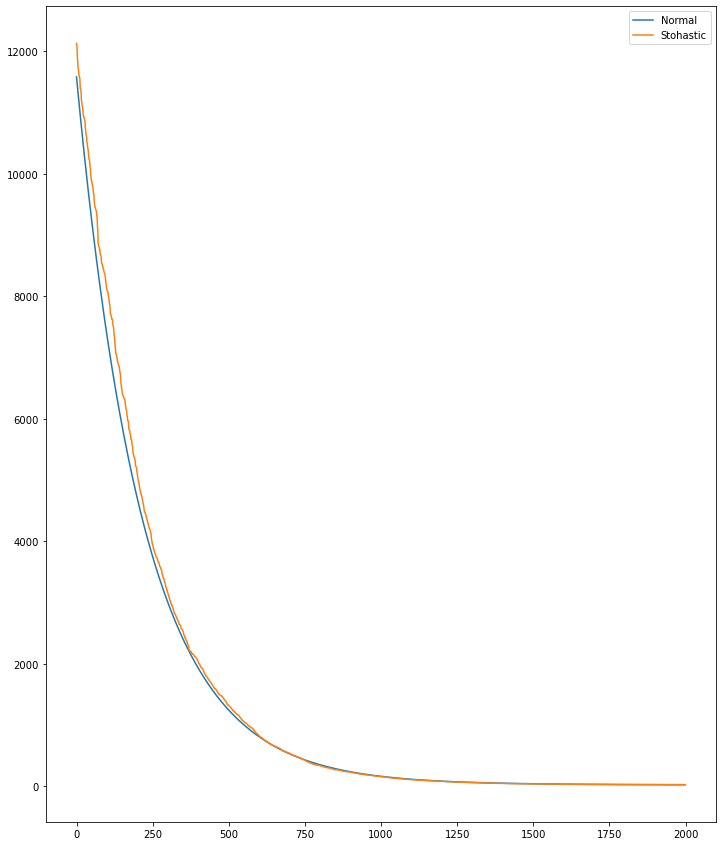

In [21]:
plt.figure(figsize=(12, 15))
plt.plot(ord_results[:, 0], ord_results[:, 1], label="Normal")
plt.plot(st_results[:, 0], st_results[:, 1], label="Stohastic")
plt.legend()
plt.show()

Кривая стохастического градиентного спуска более "неровная", конечная ошибка близка у обоих методов, но в обычном градиентном спуске меньше.